In [51]:
#!pip install mlflow==2

In [30]:
import pycaret
import mlflow
#mlflow.set_tracking_uri("http://localhost:5000")

In [31]:
import pycaret
pycaret.__version__

'3.0.0'

In [32]:
import pandas as pd
data = pd.read_csv('../data/raw/raw_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
from pycaret.classification import *

# set the path to the mlruns directory
mlflow.set_tracking_uri('../mlruns')

# create experiment
s = setup(data, target='Churn', session_id=123, ignore_features=['customerID'],
          log_experiment=True, experiment_name='churn')


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


2023/05/10 17:59:31 INFO mlflow.tracking.fluent: Experiment with name 'churn' does not exist. Creating a new experiment.


In [35]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8030,0.8480,0.5337,0.6600,0.5895,0.4620,0.4669,0.8440
lda,Linear Discriminant Analysis,0.8028,0.8403,0.5620,0.6506,0.6023,0.4722,0.4750,0.8580
lr,Logistic Regression,0.8006,0.8438,0.5375,0.6536,0.5891,0.4591,0.4635,2.4210
ridge,Ridge Classifier,0.8006,0.0000,0.5069,0.6652,0.5746,0.4475,0.4551,0.7290
gbc,Gradient Boosting Classifier,0.8004,0.8492,0.5215,0.6567,0.5803,0.4518,0.4576,0.8720
lightgbm,Light Gradient Boosting Machine,0.7941,0.8336,0.5283,0.6364,0.5762,0.4420,0.4461,0.8370
xgboost,Extreme Gradient Boosting,0.7870,0.8255,0.5284,0.6151,0.5673,0.4274,0.4303,0.8430
rf,Random Forest Classifier,0.7830,0.8134,0.4756,0.6198,0.5374,0.3989,0.4054,1.0030
knn,K Neighbors Classifier,0.7728,0.7776,0.5162,0.5821,0.5460,0.3955,0.3975,0.6740
et,Extra Trees Classifier,0.7611,0.7841,0.4457,0.5650,0.4974,0.3436,0.3484,1.7210


In [36]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)


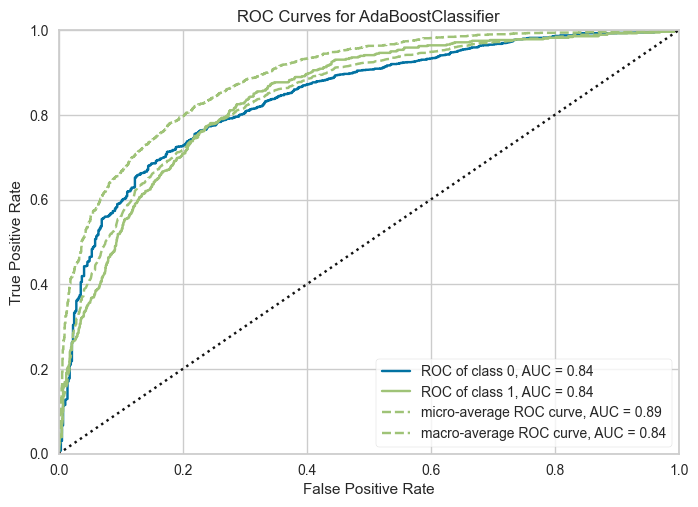

In [37]:
plot_model(best_model, plot = 'auc')

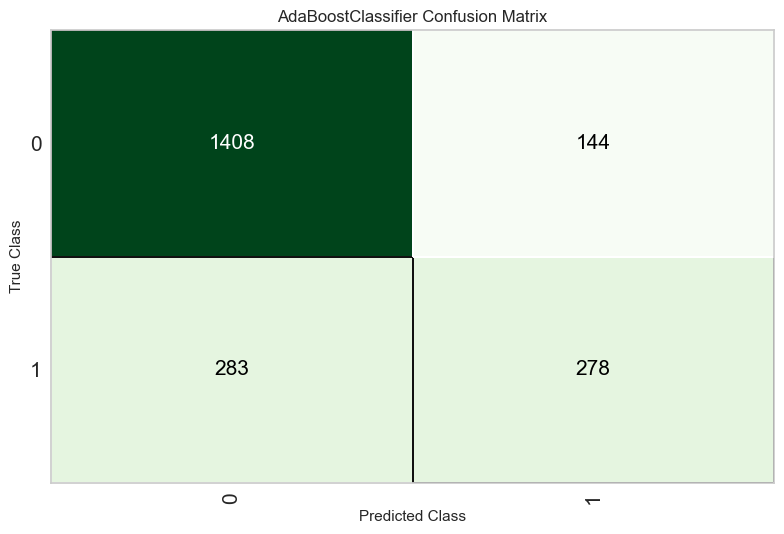

In [38]:
plot_model(best_model, plot = 'confusion_matrix')

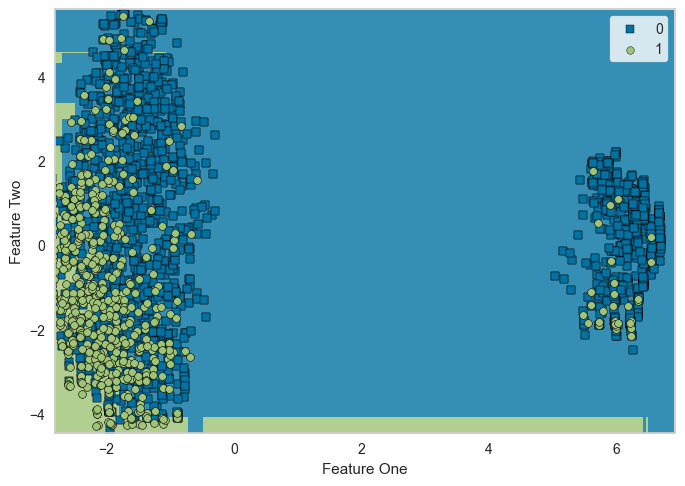

In [39]:
plot_model(best_model, plot = 'boundary')

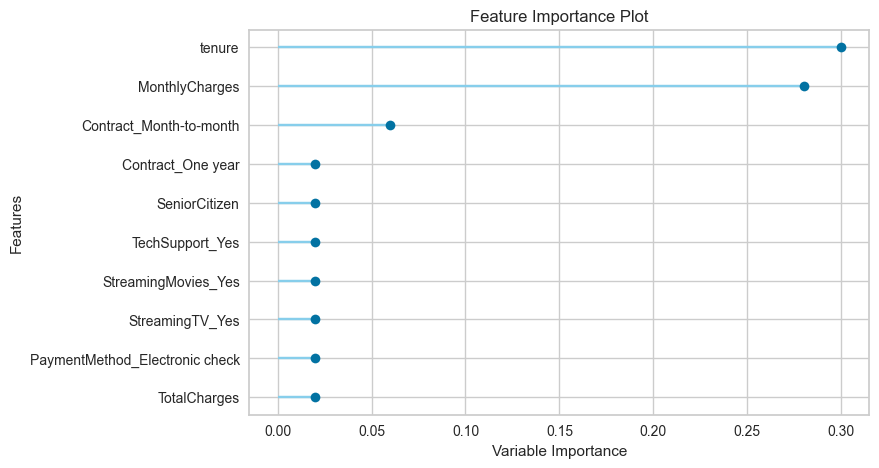

In [40]:
plot_model(best_model, plot = 'feature')

In [41]:
# save pipeline
save_model(best_model, '../models/Churn_Development_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Abhilash\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=Tru...
                  TransformerWrapper(exclude=None, include=['TotalCharges'],
                                     transformer=LeaveOneOutEncoder(cols=['TotalCharges'],
                                                                    drop_invariant=False,
                                                                    handle_missing

#### MLFlow UI

In [63]:
# start the mlflow ui http://localhost:5000
!mlflow ui

^C
